In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import geopandas as gpd
from shapely.geometry import LineString, Point, Polygon, MultiPolygon

C:\Users\rkddn\.conda\envs\ox\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.11.0-CAPI-1.17.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
sido_cd_nm = {
    '11' : '서울특별시',
    '21' : '부산광역시',
    '22' : '대구광역시',
    '23' : '인천광역시',
    '24' : '광주광역시',
    '25' : '대전광역시',
    '26' : '울산광역시',
    '29' : '세종특별자치시',
    '31' : '경기도',
    '32' : '강원도',
    '33' : '충청북도',
    '34' : '충청남도',
    '35' : '전라북도',
    '36' : '전라남도',
    '37' : '경상북도',
    '38' : '경상남도',
    '39' : '제주특별자치도',
}

In [3]:
sido_abbr_nm = {
    '서울' : '서울특별시',
    '부산' : '부산광역시',
    '대구' : '대구광역시',
    '인천' : '인천광역시',
    '광주' : '광주광역시',
    '대전' : '대전광역시',
    '울산' : '울산광역시',
    '세종' : '세종특별자치시',
    '경기' : '경기도',
    '강원' : '강원도',
    '충북' : '충청북도',
    '충남' : '충청남도',
    '전북' : '전라북도',
    '전남' : '전라남도',
    '경북' : '경상북도',
    '경남' : '경상남도',
    '제주' : '제주특별자치도',
}

In [4]:
change_sgg_data = {
    '23030': {'시군구':'미추홀구', '시군구코드':'23090'},
    '29' : {'시군구':'세종시', '시군구코드':'29010'}
} 

## 교육정도별 데이터

In [5]:
edu_15 = pd.read_excel('../data/1/education/2015.xlsx')
edu_20 = pd.read_excel('../data/1/education/2020.xlsx')

edu_15.columns = [' '.join(i.split(' ')[1:]) for i in edu_15.columns]
edu_20.columns = [' '.join(i.split(' ')[1:]) for i in edu_20.columns]

## 행정구역 데이터 정리

edu_15['시군구'] = edu_15['행정구역별(시군구)'].apply(lambda x:x.split(' ')[1])
edu_15['시군구코드'] = edu_15['행정구역별(시군구)'].apply(lambda x:x.split(' ')[0].strip())
edu_15['시군구'] = edu_15.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구'] if x['시군구코드'] in change_sgg_data else x['시군구'], axis=1)
edu_15['시군구코드'] = edu_15.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
edu_15['시도코드'] = edu_15['시군구코드'].apply(lambda x:str(x)[:2])
edu_15['시도'] = edu_15['시도코드'].apply(lambda x: sido_cd_nm[x])
edu_15['행정구역'] = edu_15['시도'] + ' '+ edu_15['시군구']

edu_20['시군구'] = edu_20['행정구역별(시군구)'].apply(lambda x:x.split(' ')[1])
edu_20['시군구코드'] = edu_20['행정구역별(시군구)'].apply(lambda x:x.split(' ')[0].strip())
edu_20['시도코드'] = edu_20['시군구코드'].apply(lambda x:x[:2])
edu_20['시도'] = edu_20['시도코드'].apply(lambda x: sido_cd_nm[x])
edu_20['행정구역'] = edu_20['시도'] + ' '+ edu_20['시군구']

edu_clmns = ['시도코드', '시군구코드', '행정구역', '시도', '시군구', '내국인(6세이상)', '초등학교-계', '초등학교-졸업', '초등학교-재학', '초등학교-중퇴',
       '중학교-계', '중학교-졸업', '중학교-재학', '중학교-중퇴', '고등학교-계', '고등학교-졸업', '고등학교-재학',
       '고등학교-중퇴', '대학(4년제 미만)-계', '대학-졸업', '대학-재학', '대학-수료', '대학-휴학', '대학-중퇴',
       '대학교(4년제 이상)-계', '대학교-졸업', '대학교-재학', '대학교-수료', '대학교-휴학', '대학교-중퇴',
       '대학원(석사과정)-계', '대학원-졸업', '대학원-재학', '대학원-수료', '대학원-중퇴', '대학원(박사과정)-계',
       '대학원-졸업', '대학원-재학', '대학원-수료', '대학원-중퇴', '받지않았음     (미취학 포함)']

edu_15 = edu_15[edu_clmns]
edu_20 = edu_20[edu_clmns]

edu_15['학사 학위 이상 소지자'] = edu_15[['대학교-졸업','대학원(석사과정)-계', '대학원(박사과정)-계']].sum(axis=1)
edu_20['학사 학위 이상 소지자'] = edu_20[['대학교-졸업','대학원(석사과정)-계', '대학원(박사과정)-계']].sum(axis=1)
edu_15['학사 학위 이상 소지자 비율'] = edu_15['학사 학위 이상 소지자'] / edu_15['내국인(6세이상)']
edu_20['학사 학위 이상 소지자 비율'] = edu_20['학사 학위 이상 소지자'] / edu_20['내국인(6세이상)']

edu_15

,시도코드,시군구코드,행정구역,시도,시군구,내국인(6세이상),초등학교-계,초등학교-졸업,초등학교-재학,초등학교-중퇴,...,대학원-졸업,대학원-재학,대학원-재학,대학원-수료,대학원-수료,대학원-중퇴,대학원-중퇴,받지않았음 (미취학 포함),학사 학위 이상 소지자,학사 학위 이상 소지자 비율
0,11,11010,서울특별시 종로구,서울특별시,종로구,140506,14794,8422,5581,791,...,2791,1806,696.0,904,663.0,223.0,49.0,3168,47386,0.337253
1,11,11020,서울특별시 중구,서울특별시,중구,112574,12078,7266,4047,765,...,1200,833,309.0,529,253.0,131.0,30.0,2904,32666,0.290174
2,11,11030,서울특별시 용산구,서울특별시,용산구,201237,20669,10797,8848,1024,...,3411,1533,570.0,1630,964.0,444.0,104.0,4403,74819,0.371795
3,11,11040,서울특별시 성동구,서울특별시,성동구,270022,29076,15473,12046,1557,...,2723,2583,894.0,1703,914.0,410.0,63.0,5712,86298,0.319596
4,11,11050,서울특별시 광진구,서울특별시,광진구,335188,33208,16799,14830,1579,...,2832,3069,711.0,1571,656.0,369.0,47.0,5927,101741,0.303534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,38,38380,경상남도 함양군,경상남도,함양군,36494,8557,6176,1687,694,...,54,26,10.0,69,29.0,12.0,2.0,5079,4110,0.112621
260,38,38390,경상남도 거창군,경상남도,거창군,57442,12398,8571,2965,862,...,119,90,16.0,86,75.0,20.0,NaN,6107,7466,0.129975
261,38,38400,경상남도 합천군,경상남도,합천군,42850,10442,8068,1411,963,...,47,54,18.0,66,21.0,18.0,4.0,7597,4182,0.097596
262,39,39010,제주특별자치도 제주시,제주특별자치도,제주시,412125,57206,24207,30228,2771,...,1822,1535,410.0,1275,643.0,309.0,71.0,17509,84706,0.205535


In [6]:
edu_15[edu_15['시도']=='서울특별시']

,시도코드,시군구코드,행정구역,시도,시군구,내국인(6세이상),초등학교-계,초등학교-졸업,초등학교-재학,초등학교-중퇴,...,대학원-졸업,대학원-재학,대학원-재학,대학원-수료,대학원-수료,대학원-중퇴,대학원-중퇴,받지않았음 (미취학 포함),학사 학위 이상 소지자,학사 학위 이상 소지자 비율
0,11,11010,서울특별시 종로구,서울특별시,종로구,140506,14794,8422,5581,791,...,2791,1806,696.0,904,663.0,223.0,49.0,3168,47386,0.337253
1,11,11020,서울특별시 중구,서울특별시,중구,112574,12078,7266,4047,765,...,1200,833,309.0,529,253.0,131.0,30.0,2904,32666,0.290174
2,11,11030,서울특별시 용산구,서울특별시,용산구,201237,20669,10797,8848,1024,...,3411,1533,570.0,1630,964.0,444.0,104.0,4403,74819,0.371795
3,11,11040,서울특별시 성동구,서울특별시,성동구,270022,29076,15473,12046,1557,...,2723,2583,894.0,1703,914.0,410.0,63.0,5712,86298,0.319596
4,11,11050,서울특별시 광진구,서울특별시,광진구,335188,33208,16799,14830,1579,...,2832,3069,711.0,1571,656.0,369.0,47.0,5927,101741,0.303534
5,11,11060,서울특별시 동대문구,서울특별시,동대문구,333788,38846,22431,14091,2324,...,2125,3388,894.0,1152,714.0,368.0,57.0,8127,84142,0.252082
6,11,11070,서울특별시 중랑구,서울특별시,중랑구,377939,45874,26294,16667,2913,...,1191,1528,513.0,1016,415.0,245.0,20.0,8870,72076,0.190708
7,11,11080,서울특별시 성북구,서울특별시,성북구,423352,50672,25593,22472,2607,...,3956,3788,1275.0,2188,1281.0,610.0,81.0,9305,121596,0.287222
8,11,11090,서울특별시 강북구,서울특별시,강북구,301584,40362,24405,13279,2678,...,1276,1168,300.0,770,407.0,285.0,47.0,8029,57643,0.191134
9,11,11100,서울특별시 도봉구,서울특별시,도봉구,321886,36588,19270,15560,1758,...,1432,1363,328.0,978,442.0,226.0,61.0,7039,76806,0.238612


In [7]:
edu_20[edu_20['시도']=='서울특별시']

,시도코드,시군구코드,행정구역,시도,시군구,내국인(6세이상),초등학교-계,초등학교-졸업,초등학교-재학,초등학교-중퇴,...,대학원-졸업,대학원-재학,대학원-재학,대학원-수료,대학원-수료,대학원-중퇴,대학원-중퇴,받지않았음 (미취학 포함),학사 학위 이상 소지자,학사 학위 이상 소지자 비율
0,11,11010,서울특별시 종로구,서울특별시,종로구,135937,11331,5647,5181,503,...,3021,2072,828,897,780,312,89.0,2207,53529,0.393778
1,11,11020,서울특별시 중구,서울특별시,중구,113281,9293,5166,3599,528,...,1668,1177,394,601,489,219,41.0,1758,40716,0.359425
2,11,11030,서울특별시 용산구,서울특별시,용산구,201048,14855,6389,7607,859,...,4457,2543,848,1338,1033,508,60.0,2970,90930,0.452280
3,11,11040,서울특별시 성동구,서울특별시,성동구,269074,23634,11732,10503,1399,...,3073,2951,967,1506,990,500,103.0,4495,102482,0.380869
4,11,11050,서울특별시 광진구,서울특별시,광진구,323531,27453,13006,13129,1318,...,2686,3283,889,1135,844,461,92.0,4233,109917,0.339742
5,11,11060,서울특별시 동대문구,서울특별시,동대문구,320101,31241,17308,12584,1349,...,2461,3585,911,1134,688,420,92.0,5725,90036,0.281274
6,11,11070,서울특별시 중랑구,서울특별시,중랑구,365151,38187,21108,14577,2502,...,1117,1512,361,811,380,305,47.0,6008,77135,0.211241
7,11,11080,서울특별시 성북구,서울특별시,성북구,409844,41234,19820,19490,1924,...,4005,4658,1709,1928,1316,594,97.0,7628,124910,0.304774
8,11,11090,서울특별시 강북구,서울특별시,강북구,286029,32857,19563,11196,2098,...,1120,1336,327,772,313,228,75.0,6010,57378,0.200602
9,11,11100,서울특별시 도봉구,서울특별시,도봉구,302868,31331,16481,12812,2038,...,1331,1260,378,776,409,351,8.0,5446,73232,0.241795


## 소득

In [8]:
income_1418 = pd.read_csv('../data/1/income/income.csv', encoding='cp949')
income_1418 = income_1418.rename(columns = {'시군구':'행정구역'})

income_1418['시도'] = income_1418['행정구역'].apply(lambda x:x.split(' ')[0])
income_1418['시군구'] = income_1418['행정구역'].apply(lambda x:x.split(' ')[1] if len(x.split(' ')) > 1 else np.nan)
income_1418['시군구'] = income_1418['시군구'].fillna('세종시') # 유일한 빈값이 세종특별자치시임
income_1418['행정구역'] =income_1418['시도'] + " "+ income_1418['시군구']

income_1418 = income_1418[['행정구역','시도','시군구','2014년','2015년','2016년','2017년','2018년']]

income_1418

,행정구역,시도,시군구,2014년,2015년,2016년,2017년,2018년
0,서울특별시 종로구,서울특별시,종로구,2723293,2755607,2737610,2870292,3007628
1,서울특별시 중구,서울특별시,중구,2865653,2922120,3001390,3078491,3120706
2,서울특별시 용산구,서울특별시,용산구,2180357,2327359,2369072,2464669,2539369
3,서울특별시 성동구,서울특별시,성동구,2042650,2141397,2214343,2386608,2476470
4,서울특별시 광진구,서울특별시,광진구,1788230,1832328,1874423,1949150,1997491
...,...,...,...,...,...,...,...,...
224,경상남도 함양군,경상남도,함양군,1475940,1544683,1582528,1669689,1740939
225,경상남도 거창군,경상남도,거창군,1443210,1502863,1592552,1678227,1755211
226,경상남도 합천군,경상남도,합천군,1405995,1461014,1517939,1599959,1700104
227,제주특별자치도 제주시,제주특별자치도,제주시,1638462,1730353,1804397,1911227,2015490


In [9]:
income_list = []

for year in range(2014,2019):
    income_process = income_1418.copy()
    income_process = income_process[['행정구역','시도','시군구',str(year)+'년']]
    income_process.loc[:,'시점'] = year
    income_process.rename(columns={str(year)+'년':'소득월액'}, inplace =True)
    income_list.append(income_process[['행정구역','시도','시군구','시점','소득월액']])
    
income_new = pd.concat(income_list).reset_index().drop(columns=['index'])
income_new

,행정구역,시도,시군구,시점,소득월액
0,서울특별시 종로구,서울특별시,종로구,2014,2723293
1,서울특별시 중구,서울특별시,중구,2014,2865653
2,서울특별시 용산구,서울특별시,용산구,2014,2180357
3,서울특별시 성동구,서울특별시,성동구,2014,2042650
4,서울특별시 광진구,서울특별시,광진구,2014,1788230
...,...,...,...,...,...
1140,경상남도 함양군,경상남도,함양군,2018,1740939
1141,경상남도 거창군,경상남도,거창군,2018,1755211
1142,경상남도 합천군,경상남도,합천군,2018,1700104
1143,제주특별자치도 제주시,제주특별자치도,제주시,2018,2015490


In [10]:
set(income_new['행정구역']) - set(income_1418['행정구역'])

set()

In [11]:
income_1418[income_1418['행정구역'].str.contains('세종')]

,행정구역,시도,시군구,2014년,2015년,2016년,2017년,2018년
74,세종특별자치시 세종시,세종특별자치시,세종시,2039151,2127799,2159363,2223934,2262502


## EQ-5D

In [12]:
eq5d = pd.read_excel('../data/1/eq5d/eq5d.xlsx').rename(columns={'시군구별(1)':'시도','시군구별(2)':'시군구', '표준화율 (점)':'EQ5D'})
eq5d['시군구'] = eq5d['시군구'].apply(lambda x:x.split(' ')[0])
## 2014년 충북 청원 -> 충북 청주시 청원구 변환됨
eq5d = eq5d[eq5d['시점']<2019]
eq5d = eq5d[['시도','시군구','시점','EQ5D']]
eq5d

C:\Users\rkddn\.conda\envs\ox\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도,시군구,시점,EQ5D
0,서울특별시,강남구,2014,0.963
1,서울특별시,강동구,2014,0.947
2,서울특별시,강북구,2014,0.933
3,서울특별시,강서구,2014,0.951
4,서울특별시,관악구,2014,0.944
...,...,...,...,...
1140,경상남도,함안군,2018,0.959
1141,경상남도,함양군,2018,0.960
1142,경상남도,합천군,2018,0.957
1143,제주특별자치도,서귀포시,2018,0.955


In [13]:
eq5d.dtypes

시도       object
시군구      object
시점        int64
EQ5D    float64
dtype: object

In [14]:
1374 / 4

343.5

## 대사증후군

In [15]:
metabolic = pd.read_excel('../data/1/metabolic/metabolic.xlsx')
metabolic['시도'] = metabolic['시도'].apply(lambda x: sido_abbr_nm[x])
metabolic['시군구'] = metabolic['시군구'].apply(lambda x:x.split(' ')[0])
## 2014년 충북 청원 -> 충북 청주시 청원구 변환됨
metabolic = metabolic.groupby(['시도','시군구','시점']).mean().reset_index()
metabolic['대사증후군(3~5개)_미만_종합 비율'] = 100 - metabolic['대사증후군(3~5개)_종합 비율'] 
metabolic

,시도,시군구,시점,전체비율,대사증후군(3~5개)_종합 비율,대사증후군_비율_3개,대사증후군_비율_4개,대사증후군_비율_5개,대사증후군(3~5개)_미만_종합 비율
0,강원도,강릉시,2014,77.0,26.4,16.1,8.2,2.1,73.6
1,강원도,강릉시,2015,76.5,26.6,16.2,8.1,2.3,73.4
2,강원도,강릉시,2016,77.2,27.9,16.5,8.7,2.7,72.1
3,강원도,강릉시,2017,77.8,29.5,16.8,9.8,2.9,70.5
4,강원도,강릉시,2018,83.3,35.1,19.6,11.4,4.1,64.9
...,...,...,...,...,...,...,...,...,...
1140,충청북도,충주시,2014,75.2,24.7,14.9,7.5,2.3,75.3
1141,충청북도,충주시,2015,75.7,26.5,15.7,8.2,2.6,73.5
1142,충청북도,충주시,2016,76.6,27.6,15.9,8.7,3.0,72.4
1143,충청북도,충주시,2017,77.9,28.5,16.6,9.0,3.0,71.5


## 주거

In [16]:
# 거처의 종류별/주거시설 형태별 가구(일반가구)-시군구
house_15 = pd.read_excel('../data/1/house/2015.xlsx')

house_15.columns = [' '.join(i.split(' ')[1:]) for i in house_15.columns]

## 행정구역 데이터 정리

house_15['시군구'] = house_15['행정구역별(시군구)'].apply(lambda x:x.split(' ')[1])
house_15['시군구코드'] = house_15['행정구역별(시군구)'].apply(lambda x:x.split(' ')[0].strip())
house_15['시군구'] = house_15.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구'] if x['시군구코드'] in change_sgg_data else x['시군구'], axis=1)
house_15['시군구코드'] = house_15.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
house_15['시도코드'] = house_15['시군구코드'].apply(lambda x:str(x)[:2])
house_15['시도'] = house_15['시도코드'].apply(lambda x: sido_cd_nm[x])
house_15['행정구역'] = house_15['시도'] + ' '+ edu_15['시군구']

house_clmns = ['시도코드','시군구코드', '행정구역','시도', '시군구',  '일반가구', '부엌_현대식(입식)_계', '부엌_현대식(입식)_단독사용',
       '부엌_현대식(입식)_공동사용', '부엌_재래식_계', '부엌_재래식_단독사용', '부엌_재래식_공동사용', '부엌_없음',
       '수도_상수도', '수도_마을상수도(간이상수도)', '수도_전용상수도', '수도_없음', '화장실_수세식_계',
       '화장실_수세식_단독사용', '화장실_수세식_공동사용', '화장실_재래식_계', '화장실_재래식_단독사용',
       '화장실_재래식_공동사용', '화장실_없음', '목욕시설_있음_계', '목욕시설_단독사용', '목욕시설_공동사용',
       '목욕시설_없음', '온수시설_있음', '온수시설_없음']

house_15 = house_15[house_clmns]

house_15['화장실_수세식_계'] = house_15['화장실_수세식_계'].fillna(0)
house_15['수도_없음'] = house_15['수도_없음'].fillna(0)
house_15['온수시설_있음'] = house_15['온수시설_있음'].fillna(0)
house_15['온수시설_없음'] = house_15['온수시설_없음'].fillna(0)
house_15['화장실_재래식_공동사용'] = house_15['화장실_재래식_공동사용'].fillna(0)
house_15['화장실_수세식_공동사용'] = house_15['화장실_수세식_공동사용'].fillna(0)

house_15['화장실_공동사용'] =  house_15['화장실_재래식_공동사용'] + house_15['화장실_수세식_공동사용']

house_15['화장실_수세식_비율'] = house_15['화장실_수세식_계'] / house_15['일반가구']
house_15['수도_없음_비율'] = house_15['수도_없음'] / house_15['일반가구']
house_15['온수시설_있음_비율'] = house_15['온수시설_있음'] / house_15['일반가구']
house_15['온수시설_없음_비율'] = house_15['온수시설_없음'] / house_15['일반가구']
house_15['화장실_공동사용_비율'] = house_15['화장실_공동사용'] / house_15['일반가구']


house_15

,시도코드,시군구코드,행정구역,시도,시군구,일반가구,부엌_현대식(입식)_계,부엌_현대식(입식)_단독사용,부엌_현대식(입식)_공동사용,부엌_재래식_계,...,목욕시설_공동사용,목욕시설_없음,온수시설_있음,온수시설_없음,화장실_공동사용,화장실_수세식_비율,수도_없음_비율,온수시설_있음_비율,온수시설_없음_비율,화장실_공동사용_비율
0,11,11010,서울특별시 종로구,서울특별시,종로구,61638,61142,58967,2175,442,...,2188,1323,61351,287.0,2815.0,0.993786,0.000227,0.995344,0.004656,0.045670
1,11,11020,서울특별시 중구,서울특별시,중구,51239,50771,48587,2184,301,...,1752,1270,51057,182.0,2428.0,0.994496,0.000566,0.996448,0.003552,0.047386
2,11,11030,서울특별시 용산구,서울특별시,용산구,90336,89823,88433,1390,486,...,1666,1186,90297,39.0,2158.0,0.995118,0.000144,0.999568,0.000432,0.023889
3,11,11040,서울특별시 성동구,서울특별시,성동구,114738,114189,112314,1875,472,...,1394,1190,114724,14.0,2274.0,0.994605,0.000427,0.999878,0.000122,0.019819
4,11,11050,서울특별시 광진구,서울특별시,광진구,147673,146577,143777,2800,689,...,2391,1106,147673,0.0,2801.0,0.994122,0.000122,1.000000,0.000000,0.018968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,38,38380,경상남도 함양군,경상남도,함양군,16676,16380,16250,130,294,...,127,1016,16482,194.0,188.0,0.933617,0.007736,0.988367,0.011633,0.011274
260,38,38390,경상남도 거창군,경상남도,거창군,24719,24415,24223,192,294,...,171,1599,24521,198.0,354.0,0.909341,0.010154,0.991990,0.008010,0.014321
261,38,38400,경상남도 합천군,경상남도,합천군,20419,19928,19756,172,450,...,149,2067,20118,301.0,287.0,0.872815,0.009599,0.985259,0.014741,0.014056
262,39,39010,제주특별자치도 제주시,제주특별자치도,제주시,163454,161871,160228,1643,1446,...,1940,3107,163043,411.0,3683.0,0.988046,0.000385,0.997486,0.002514,0.022532


In [17]:
house_15.columns

Index(['시도코드', '시군구코드', '행정구역', '시도', '시군구', '일반가구', '부엌_현대식(입식)_계',
       '부엌_현대식(입식)_단독사용', '부엌_현대식(입식)_공동사용', '부엌_재래식_계', '부엌_재래식_단독사용',
       '부엌_재래식_공동사용', '부엌_없음', '수도_상수도', '수도_마을상수도(간이상수도)', '수도_전용상수도',
       '수도_없음', '화장실_수세식_계', '화장실_수세식_단독사용', '화장실_수세식_공동사용', '화장실_재래식_계',
       '화장실_재래식_단독사용', '화장실_재래식_공동사용', '화장실_없음', '목욕시설_있음_계', '목욕시설_단독사용',
       '목욕시설_공동사용', '목욕시설_없음', '온수시설_있음', '온수시설_없음', '화장실_공동사용', '화장실_수세식_비율',
       '수도_없음_비율', '온수시설_있음_비율', '온수시설_없음_비율', '화장실_공동사용_비율'],
      dtype='object')

## 주택가격

In [18]:
HousingPriceDfs = []

In [19]:
housing = pd.read_excel('../data/1/housing/House.xlsx')
housing = housing.rename(columns={'SGG 시군구별':'시군구', 
 'TIME 시점':'시점', 
 'HO10 계':'계', 
 'HO20 주택소유':'주택소유', 
 'HO21 1건 소유':'1건 소유',
 'HO22 2건 소유':'2건 소유', 
 'HO23 3건 이상 소유':'3건 이상 소유', 
 'HO30 무주택':'무주택'})
housing['시군구코드'] = housing['시군구'].apply(lambda x: x.split(' ')[0].strip())
housing['시군구'] = housing['시군구'].apply(lambda x: x.split(' ')[1].strip())
housing['시점'] = housing['시점'].apply(lambda x: int(x.split(' ')[1].strip()))

housing14 = housing.loc[housing['시점']==2016, ].copy()
housing14['시점'] = 2014
housing15 = housing.loc[housing['시점']==2016, ].copy()
housing15['시점'] = 2015

housing = pd.concat([housing,housing14,housing15], axis=0)

housing['시군구'] = housing.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구'] if x['시군구코드'] in change_sgg_data else x['시군구'], axis=1)
housing['시군구코드'] = housing.apply(lambda x: change_sgg_data[x['시군구코드']]['시군구코드'] if x['시군구코드'] in change_sgg_data else x['시군구코드'], axis=1)
housing['시도'] =  housing.apply(lambda x: sido_cd_nm[x['시군구코드'][:2]], axis=1)
housing['주택소유비율'] = (housing['주택소유']) / housing['계'] * 100

housing = housing.reset_index().drop(columns=['index','계', '주택소유', '1건 소유', '2건 소유', '3건 이상 소유', '무주택'])
housing = housing[['시군구코드','시도','시군구','시점','주택소유비율']]
housing

C:\Users\rkddn\.conda\envs\ox\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시군구코드,시도,시군구,시점,주택소유비율
0,11010,서울특별시,종로구,2016,58.661569
1,11010,서울특별시,종로구,2017,58.580809
2,11010,서울특별시,종로구,2018,58.927599
3,11020,서울특별시,중구,2016,50.505381
4,11020,서울특별시,중구,2017,50.312306
...,...,...,...,...,...
1300,38380,경상남도,함양군,2015,70.360982
1301,38390,경상남도,거창군,2015,69.447375
1302,38400,경상남도,합천군,2015,69.333454
1303,39010,제주특별자치도,제주시,2015,60.749469


In [20]:
housing[housing['시군구코드']=='29010']

,시군구코드,시도,시군구,시점,주택소유비율
222,29010,세종특별자치시,세종시,2016,65.317919
223,29010,세종특별자치시,세종시,2017,66.271518
224,29010,세종특별자치시,세종시,2018,66.517857
857,29010,세종특별자치시,세종시,2014,65.317919
1118,29010,세종특별자치시,세종시,2015,65.317919


## 데이터 통합

In [21]:
merged_con_var_df = pd.merge(income_new[['행정구역','시도','시군구','시점','소득월액']], edu_15[['시군구코드', '행정구역', '시도', '시군구', '학사 학위 이상 소지자 비율']], on=['행정구역', '시도', '시군구'], how='inner')
merged_con_var_df = pd.merge(merged_con_var_df, eq5d, on=['시도', '시군구', '시점'], how='inner' )
merged_con_var_df = pd.merge(merged_con_var_df, housing, on=['시군구코드', '시도', '시군구', '시점'], how='inner' )

#merged_con_var_df = pd.merge(merged_con_var_df, house_15[['시군구코드', '행정구역','시도','시군구','온수시설_있음_비율']], on=['시군구코드', '행정구역','시도','시군구'], how='inner' )

merged_con_var_df

,행정구역,시도,시군구,시점,소득월액,시군구코드,학사 학위 이상 소지자 비율,EQ5D,주택소유비율
0,서울특별시 종로구,서울특별시,종로구,2014,2723293,11010,0.337253,0.948,58.661569
1,서울특별시 종로구,서울특별시,종로구,2015,2755607,11010,0.337253,0.950,58.661569
2,서울특별시 종로구,서울특별시,종로구,2016,2737610,11010,0.337253,0.968,58.661569
3,서울특별시 종로구,서울특별시,종로구,2017,2870292,11010,0.337253,0.957,58.580809
4,서울특별시 종로구,서울특별시,종로구,2018,3007628,11010,0.337253,0.952,58.927599
...,...,...,...,...,...,...,...,...,...
1140,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2014,1602749,39020,0.145400,0.943,60.733186
1141,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2015,1711471,39020,0.145400,0.951,60.733186
1142,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2016,1772913,39020,0.145400,0.947,60.733186
1143,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2017,1880810,39020,0.145400,0.955,60.969486


In [22]:
rename_clmns = {'학사 학위 이상 소지자 비율':'Education', 
                '소득월액':'Income', 
                'EQ5D': 'Health',
                '주택소유비율': 'Housing',
               }

merged_con_var_df = merged_con_var_df.rename(columns=rename_clmns)
merged_con_var_df

,행정구역,시도,시군구,시점,Income,시군구코드,Education,Health,Housing
0,서울특별시 종로구,서울특별시,종로구,2014,2723293,11010,0.337253,0.948,58.661569
1,서울특별시 종로구,서울특별시,종로구,2015,2755607,11010,0.337253,0.950,58.661569
2,서울특별시 종로구,서울특별시,종로구,2016,2737610,11010,0.337253,0.968,58.661569
3,서울특별시 종로구,서울특별시,종로구,2017,2870292,11010,0.337253,0.957,58.580809
4,서울특별시 종로구,서울특별시,종로구,2018,3007628,11010,0.337253,0.952,58.927599
...,...,...,...,...,...,...,...,...,...
1140,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2014,1602749,39020,0.145400,0.943,60.733186
1141,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2015,1711471,39020,0.145400,0.951,60.733186
1142,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2016,1772913,39020,0.145400,0.947,60.733186
1143,제주특별자치도 서귀포시,제주특별자치도,서귀포시,2017,1880810,39020,0.145400,0.955,60.969486


## PCA 수행

In [23]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

plt.ioff()

C:\Users\rkddn\AppData\Local\Temp\ipykernel_19448\1109479931.py:5: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [64]:
#전체적으로 스케일링을 하여 같은 범위로 하게 만듦
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

sdi_df_list = [] 
pca_first_comp_explain_ratio = []

for year in range(2014, 2019):
    indicators = merged_con_var_df.loc[merged_con_var_df['시점']==year, ['시도','시군구','시군구코드','Income', 'Education', 'Health', 'Housing']].set_index(['시도','시군구','시군구코드'])

    # 정규성 체크를 위한 시각화
    plt.figure(figsize=(32,32))

    for k in range(4):
        plt.subplot(2,2,1+k)    
        sns.histplot(indicators[indicators.columns.tolist()[k]], kde=True, stat='probability')
        plt.title(f"{indicators.columns.tolist()[k]} Indicator Hist plot in {str(year)}")

    plt.savefig(f'../img/1/histplot/{str(year)}.png')
    plt.close()

    ## SCALING
    transformer = StandardScaler()
    x_data = transformer.fit_transform(indicators)

    scale_df= pd.DataFrame(x_data,columns=indicators.columns.tolist(), index=indicators.index)
    
    ## PCA
    pca = PCA().fit(scale_df)

    plt.rcParams["figure.figsize"] = (18,8)

    fig, ax = plt.subplots()
    
    pca_first_comp_explain_ratio.append(pca.explained_variance_ratio_[0])
    
    y = np.cumsum(pca.explained_variance_ratio_)
    xi = np.arange(0, len(y)+1, step=1)
    y = np.append([0], y)
    
    plt.grid()
    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='black')
    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, len(y), step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')
    plt.axhline(y=0.40, color='red', linestyle='-', alpha=0.8)
    plt.text(0.2, 0.35, '40% cut-off threshold', color = 'red', fontsize=10)
    ax.grid(axis='x')
    
    plt.savefig(f'../img/1/pca/{str(year)}.png')
    plt.close()
    
    ## PCA 실행
    pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정

    x = scale_df #스케일링 scale_df

    printcipalComponents = pca.fit_transform(x)

    # 주성분으로 이루어진 데이터 프레임 구성
    ## First Component == Social Deprivation Index
    principalDf = pd.DataFrame(data=printcipalComponents, columns = ['SDI'], index=indicators.index) 
    principalDf['SDI'] = principalDf['SDI']* -1 # 박탈지수니까 -1로 해서 박탈적일 수로 큰 수로 변환
    sdi_df = indicators.join(principalDf)
    sdi_df['시점'] = year
    
    sdi_df_list.append(sdi_df)
    
sdi_dfs = pd.concat(sdi_df_list)
sdi_dfs = sdi_dfs[['시점','SDI']]

sdi_dfs

시점       SDI
시도      시군구  시군구코드                
서울특별시   종로구  11010  2014 -3.423546
        중구   11020  2014 -3.994378
        용산구  11030  2014 -3.276231
        성동구  11040  2014 -2.385049
        광진구  11050  2014 -2.047943
...                  ...       ...
경상남도    함양군  38380  2018  1.800430
        거창군  38390  2018  1.653622
        합천군  38400  2018  2.121558
제주특별자치도 제주시  39010  2018 -0.529295
        서귀포시 39020  2018  0.169835

[1145 rows x 2 columns]

In [57]:
from scipy.stats import pearsonr
import numpy as np

year_corr = pd.concat(sdi_df_list)

year = 2018
year_corr_year = year_corr.loc[year_corr['시점']==year].drop(columns=['시점'])

rho = year_corr_year.corr()
pval = year_corr_year.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,Income,Education,Health,Housing,SDI
Income,1.0***,0.43***,0.04,-0.26***,-0.73***
Education,0.43***,1.0***,0.18***,-0.4***,-0.84***
Health,0.04,0.18***,1.0***,0.01,-0.22***
Housing,-0.26***,-0.4***,0.01,1.0***,0.69***
SDI,-0.73***,-0.84***,-0.22***,0.69***,1.0***


In [58]:
year_corr = pd.concat(sdi_df_list)
year_corr.loc[year_corr['시점']==2014].drop(columns=['시점']).corr()

,Income,Education,Health,Housing,SDI
Income,1.000000,0.456723,0.067129,-0.219425,-0.776155
Education,0.456723,1.000000,0.105244,-0.290714,-0.820205
Health,0.067129,0.105244,1.000000,0.037607,-0.173344
Housing,-0.219425,-0.290714,0.037607,1.000000,0.602241
SDI,-0.776155,-0.820205,-0.173344,0.602241,1.000000


In [59]:
year_corr.loc[year_corr['시점']==2015].drop(columns=['시점']).corr()

,Income,Education,Health,Housing,SDI
Income,1.000000,0.442512,0.066118,-0.212668,-0.753991
Education,0.442512,1.000000,0.184729,-0.290714,-0.825252
Health,0.066118,0.184729,1.000000,0.016509,-0.285484
Housing,-0.212668,-0.290714,0.016509,1.000000,0.586240
SDI,-0.753991,-0.825252,-0.285484,0.586240,1.000000


In [60]:
year_corr.loc[year_corr['시점']==2016].drop(columns=['시점']).corr()

,Income,Education,Health,Housing,SDI
Income,1.000000,0.441323,0.111793,-0.210650,-0.756251
Education,0.441323,1.000000,0.184979,-0.290714,-0.818974
Health,0.111793,0.184979,1.000000,0.004812,-0.338951
Housing,-0.210650,-0.290714,0.004812,1.000000,0.575056
SDI,-0.756251,-0.818974,-0.338951,0.575056,1.000000


In [61]:
year_corr.loc[year_corr['시점']==2017].drop(columns=['시점']).corr()

,Income,Education,Health,Housing,SDI
Income,1.000000,0.448357,-0.030126,-0.278746,-0.752509
Education,0.448357,1.000000,0.109152,-0.400519,-0.823007
Health,-0.030126,0.109152,1.000000,0.110838,0.016089
Housing,-0.278746,-0.400519,0.110838,1.000000,0.715719
SDI,-0.752509,-0.823007,0.016089,0.715719,1.000000


In [62]:
year_corr.loc[year_corr['시점']==2018].drop(columns=['시점']).corr()

,Income,Education,Health,Housing,SDI
Income,1.000000,0.433585,0.035780,-0.258466,-0.728310
Education,0.433585,1.000000,0.178695,-0.398122,-0.836118
Health,0.035780,0.178695,1.000000,0.011738,-0.222280
Housing,-0.258466,-0.398122,0.011738,1.000000,0.688554
SDI,-0.728310,-0.836118,-0.222280,0.688554,1.000000


In [63]:
pca_first_comp_explain_ratio

[0.4169737906290716,
 0.418680379496239,
 0.42205262428683227,
 0.43903086737464037,
 0.43826084004016236]

In [56]:
sdi_dfs.reset_index().to_excel('../data/1/result/sdi.xlsx', index=False)

## 시각화

In [33]:
sgg_gdf = gpd.gpd.GeoDataFrame.from_file('../data/0/shp/sgg.shp', encoding='UTF-8', crs="epsg:4326")
sgg_gdf = sgg_gdf.astype({'SGG_AD_CD':str,'SGG_LE_CD':str})
sgg_gdf

,SGG_AD_CD,SGG_LE_CD,SIDO,SGG,geometry
0,11010,11110,서울특별시,종로구,"POLYGON ((126.94890 37.62325, 126.94890 37.623..."
1,11020,11140,서울특별시,중구,"POLYGON ((126.96155 37.55860, 126.96155 37.558..."
2,11030,11170,서울특별시,용산구,"POLYGON ((126.94459 37.53378, 126.94460 37.533..."
3,11040,11200,서울특별시,성동구,"POLYGON ((127.00815 37.54506, 127.00817 37.545..."
4,11050,11215,서울특별시,광진구,"POLYGON ((127.05622 37.52832, 127.05623 37.528..."
...,...,...,...,...,...
224,38380,48870,경상남도,함양군,"POLYGON ((127.58486 35.55391, 127.58488 35.553..."
225,38390,48880,경상남도,거창군,"POLYGON ((127.67944 35.76850, 127.67945 35.768..."
226,38400,48890,경상남도,합천군,"POLYGON ((127.95323 35.53403, 127.95323 35.534..."
227,39010,50110,제주특별자치도,제주시,"MULTIPOLYGON (((126.94125 33.50648, 126.94125 ..."


In [34]:
from matplotlib.colors import TwoSlopeNorm, BoundaryNorm

for year in range(2014, 2019):

    year_data = sdi_dfs.loc[sdi_dfs['시점']==year].reset_index()

    year_data_visu = gpd.GeoDataFrame(pd.merge(sgg_gdf, year_data[['시군구코드','SDI']], left_on ='SGG_AD_CD', right_on='시군구코드', how='inner'))

    # 10분위 수로 색을 칠하기
    bounds = np.percentile(year_data['SDI'], np.linspace(0, 100, 11), interpolation='nearest')
    norm = BoundaryNorm(boundaries=bounds, ncolors=256)

    # create a normalized colorbar
    cmap = 'RdBu_r'
    cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    # 읍면동 시각화
    ax = year_data_visu.plot(
        figsize=(50, 50), column='SDI', cmap=cmap, norm=norm, legend=False)
    ax.set_axis_off()
    
    plt.savefig(f'../img/1/sdi/{str(year)}.png', bbox_inches = 'tight', pad_inches = 0)
    
    plt.close()

## Moran's I

In [35]:
import libpysal
from libpysal.weights.contiguity import Queen

from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster

In [36]:
year = 2015

year_data = sdi_dfs.loc[sdi_dfs['시점']==year].reset_index()
year_data_visu = gpd.GeoDataFrame(pd.merge(sgg_gdf, year_data[['시군구코드','SDI']], left_on ='SGG_AD_CD', right_on='시군구코드', how='inner'))
year_data_visu['geometry'] = year_data_visu['geometry'].apply(lambda x: x.buffer(0.0001))
year_data_visu.head()

,SGG_AD_CD,SGG_LE_CD,SIDO,SGG,geometry,시군구코드,SDI
0,11010,11110,서울특별시,종로구,"POLYGON ((126.94880 37.62323, 126.94880 37.623...",11010,-3.166136
1,11020,11140,서울특별시,중구,"POLYGON ((126.96145 37.55859, 126.96145 37.558...",11020,-3.952027
2,11030,11170,서울특별시,용산구,"POLYGON ((126.94451 37.53372, 126.94450 37.533...",11030,-3.339517
3,11040,11200,서울특별시,성동구,"POLYGON ((127.00806 37.54502, 127.00806 37.545...",11040,-2.619080
4,11050,11215,서울특별시,광진구,"POLYGON ((127.05619 37.52823, 127.05618 37.528...",11050,-1.711123


In [37]:
## https://pysal.org/notebooks/viz/splot/esda_morans_viz.html
### https://pysal.org/libpysal/generated/libpysal.weights.W.html#libpysal.weights.W <- 가중치 직접 만들기
y = year_data_visu['SDI'].values
kd = libpysal.cg.KDTree(np.array([(cent.x, cent.y) for cent in year_data_visu['geometry'].centroid]))
w = libpysal.weights.KNN(kd, 5)
w.transform = 'r'

C:\Users\rkddn\AppData\Local\Temp\ipykernel_19448\3640295070.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kd = libpysal.cg.KDTree(np.array([(cent.x, cent.y) for cent in year_data_visu['geometry'].centroid]))


In [38]:
moran = Moran(y, w, permutations = 95)
moran.I

0.5749560437388125

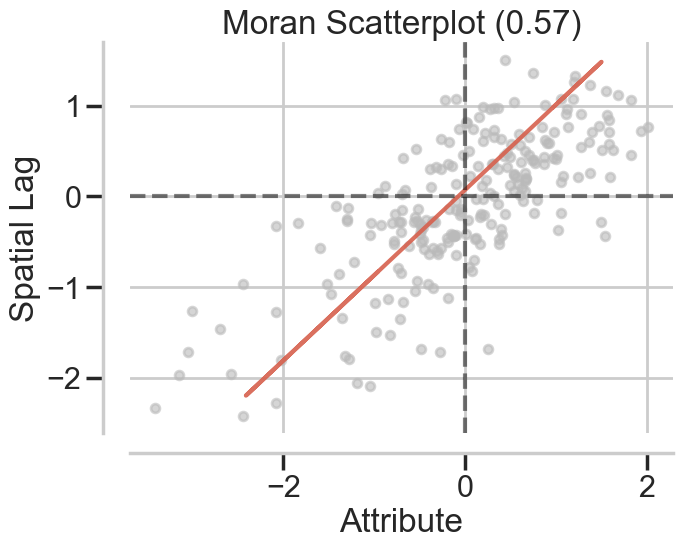

In [39]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

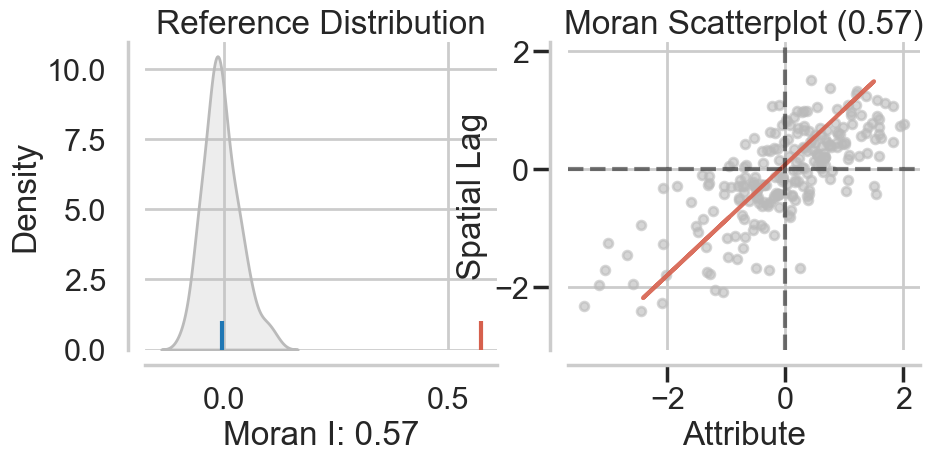

In [40]:
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

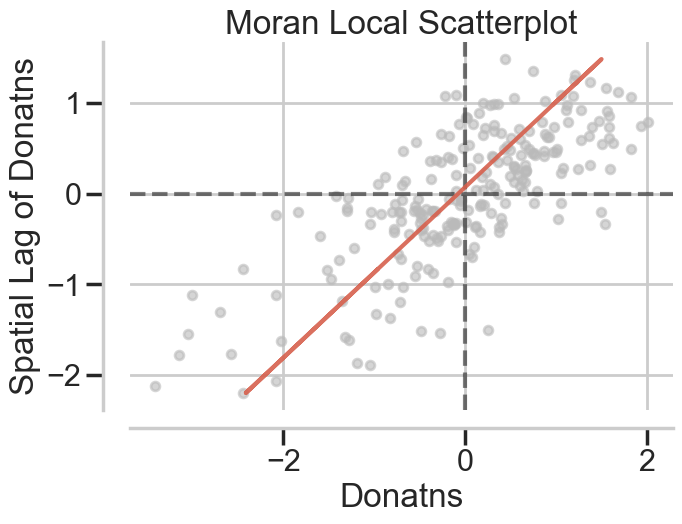

In [41]:
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

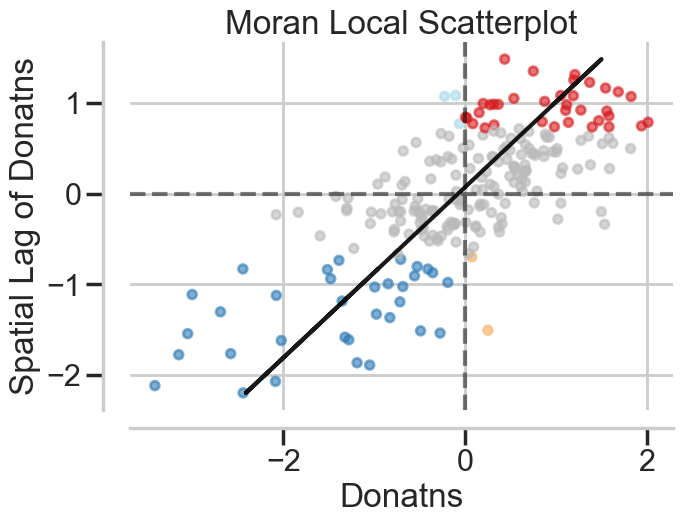

In [42]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

In [43]:
data_analysis_df = year_data_visu.copy()

data_analysis_df['significant'] = moran_loc.p_sim < 0.05
data_analysis_df['moran_loc_ql'] = moran_loc.q
data_analysis_df

,SGG_AD_CD,SGG_LE_CD,SIDO,SGG,geometry,시군구코드,SDI,significant,moran_loc_ql
0,11010,11110,서울특별시,종로구,"POLYGON ((126.94880 37.62323, 126.94880 37.623...",11010,-3.166136,True,3
1,11020,11140,서울특별시,중구,"POLYGON ((126.96145 37.55859, 126.96145 37.558...",11020,-3.952027,True,3
2,11030,11170,서울특별시,용산구,"POLYGON ((126.94451 37.53372, 126.94450 37.533...",11030,-3.339517,True,3
3,11040,11200,서울특별시,성동구,"POLYGON ((127.00806 37.54502, 127.00806 37.545...",11040,-2.619080,True,3
4,11050,11215,서울특별시,광진구,"POLYGON ((127.05619 37.52823, 127.05618 37.528...",11050,-1.711123,True,3
...,...,...,...,...,...,...,...,...,...
224,38380,48870,경상남도,함양군,"POLYGON ((127.58486 35.55381, 127.58485 35.553...",38380,2.182692,True,1
225,38390,48880,경상남도,거창군,"POLYGON ((127.67937 35.76842, 127.67937 35.768...",38390,1.564970,True,1
226,38400,48890,경상남도,합천군,"POLYGON ((127.95314 35.53399, 127.95313 35.534...",38400,1.905054,True,1
227,39010,50110,제주특별자치도,제주시,"MULTIPOLYGON (((126.94115 33.50645, 126.94115 ...",39010,-0.292362,True,2


In [44]:
data_analysis_df[data_analysis_df['SGG_AD_CD'].str.contains('^11')]

,SGG_AD_CD,SGG_LE_CD,SIDO,SGG,geometry,시군구코드,SDI,significant,moran_loc_ql
0,11010,11110,서울특별시,종로구,"POLYGON ((126.94880 37.62323, 126.94880 37.623...",11010,-3.166136,True,3
1,11020,11140,서울특별시,중구,"POLYGON ((126.96145 37.55859, 126.96145 37.558...",11020,-3.952027,True,3
2,11030,11170,서울특별시,용산구,"POLYGON ((126.94451 37.53372, 126.94450 37.533...",11030,-3.339517,True,3
3,11040,11200,서울특별시,성동구,"POLYGON ((127.00806 37.54502, 127.00806 37.545...",11040,-2.619080,True,3
4,11050,11215,서울특별시,광진구,"POLYGON ((127.05619 37.52823, 127.05618 37.528...",11050,-1.711123,True,3
5,11060,11230,서울특별시,동대문구,"POLYGON ((127.02304 37.57805, 127.02305 37.578...",11060,-1.264119,True,3
6,11070,11260,서울특별시,중랑구,"POLYGON ((127.06932 37.59530, 127.06932 37.595...",11070,-0.720063,True,3
7,11080,11290,서울특별시,성북구,"POLYGON ((126.97458 37.62971, 126.97457 37.629...",11080,-0.634157,True,3
8,11090,11305,서울특별시,강북구,"POLYGON ((126.97956 37.65602, 126.97956 37.656...",11090,0.096597,True,4
9,11100,11320,서울특별시,도봉구,"POLYGON ((127.00753 37.69158, 127.00753 37.691...",11100,0.376120,False,4


In [45]:
data_analysis_df['significant'].value_counts()

False    156
True      73
Name: significant, dtype: int64

In [46]:
# HH=1, LH=2, LL=3, HL=4
data_analysis_df['moran_loc_ql'].value_counts()

1    94
3    88
4    28
2    19
Name: moran_loc_ql, dtype: int64

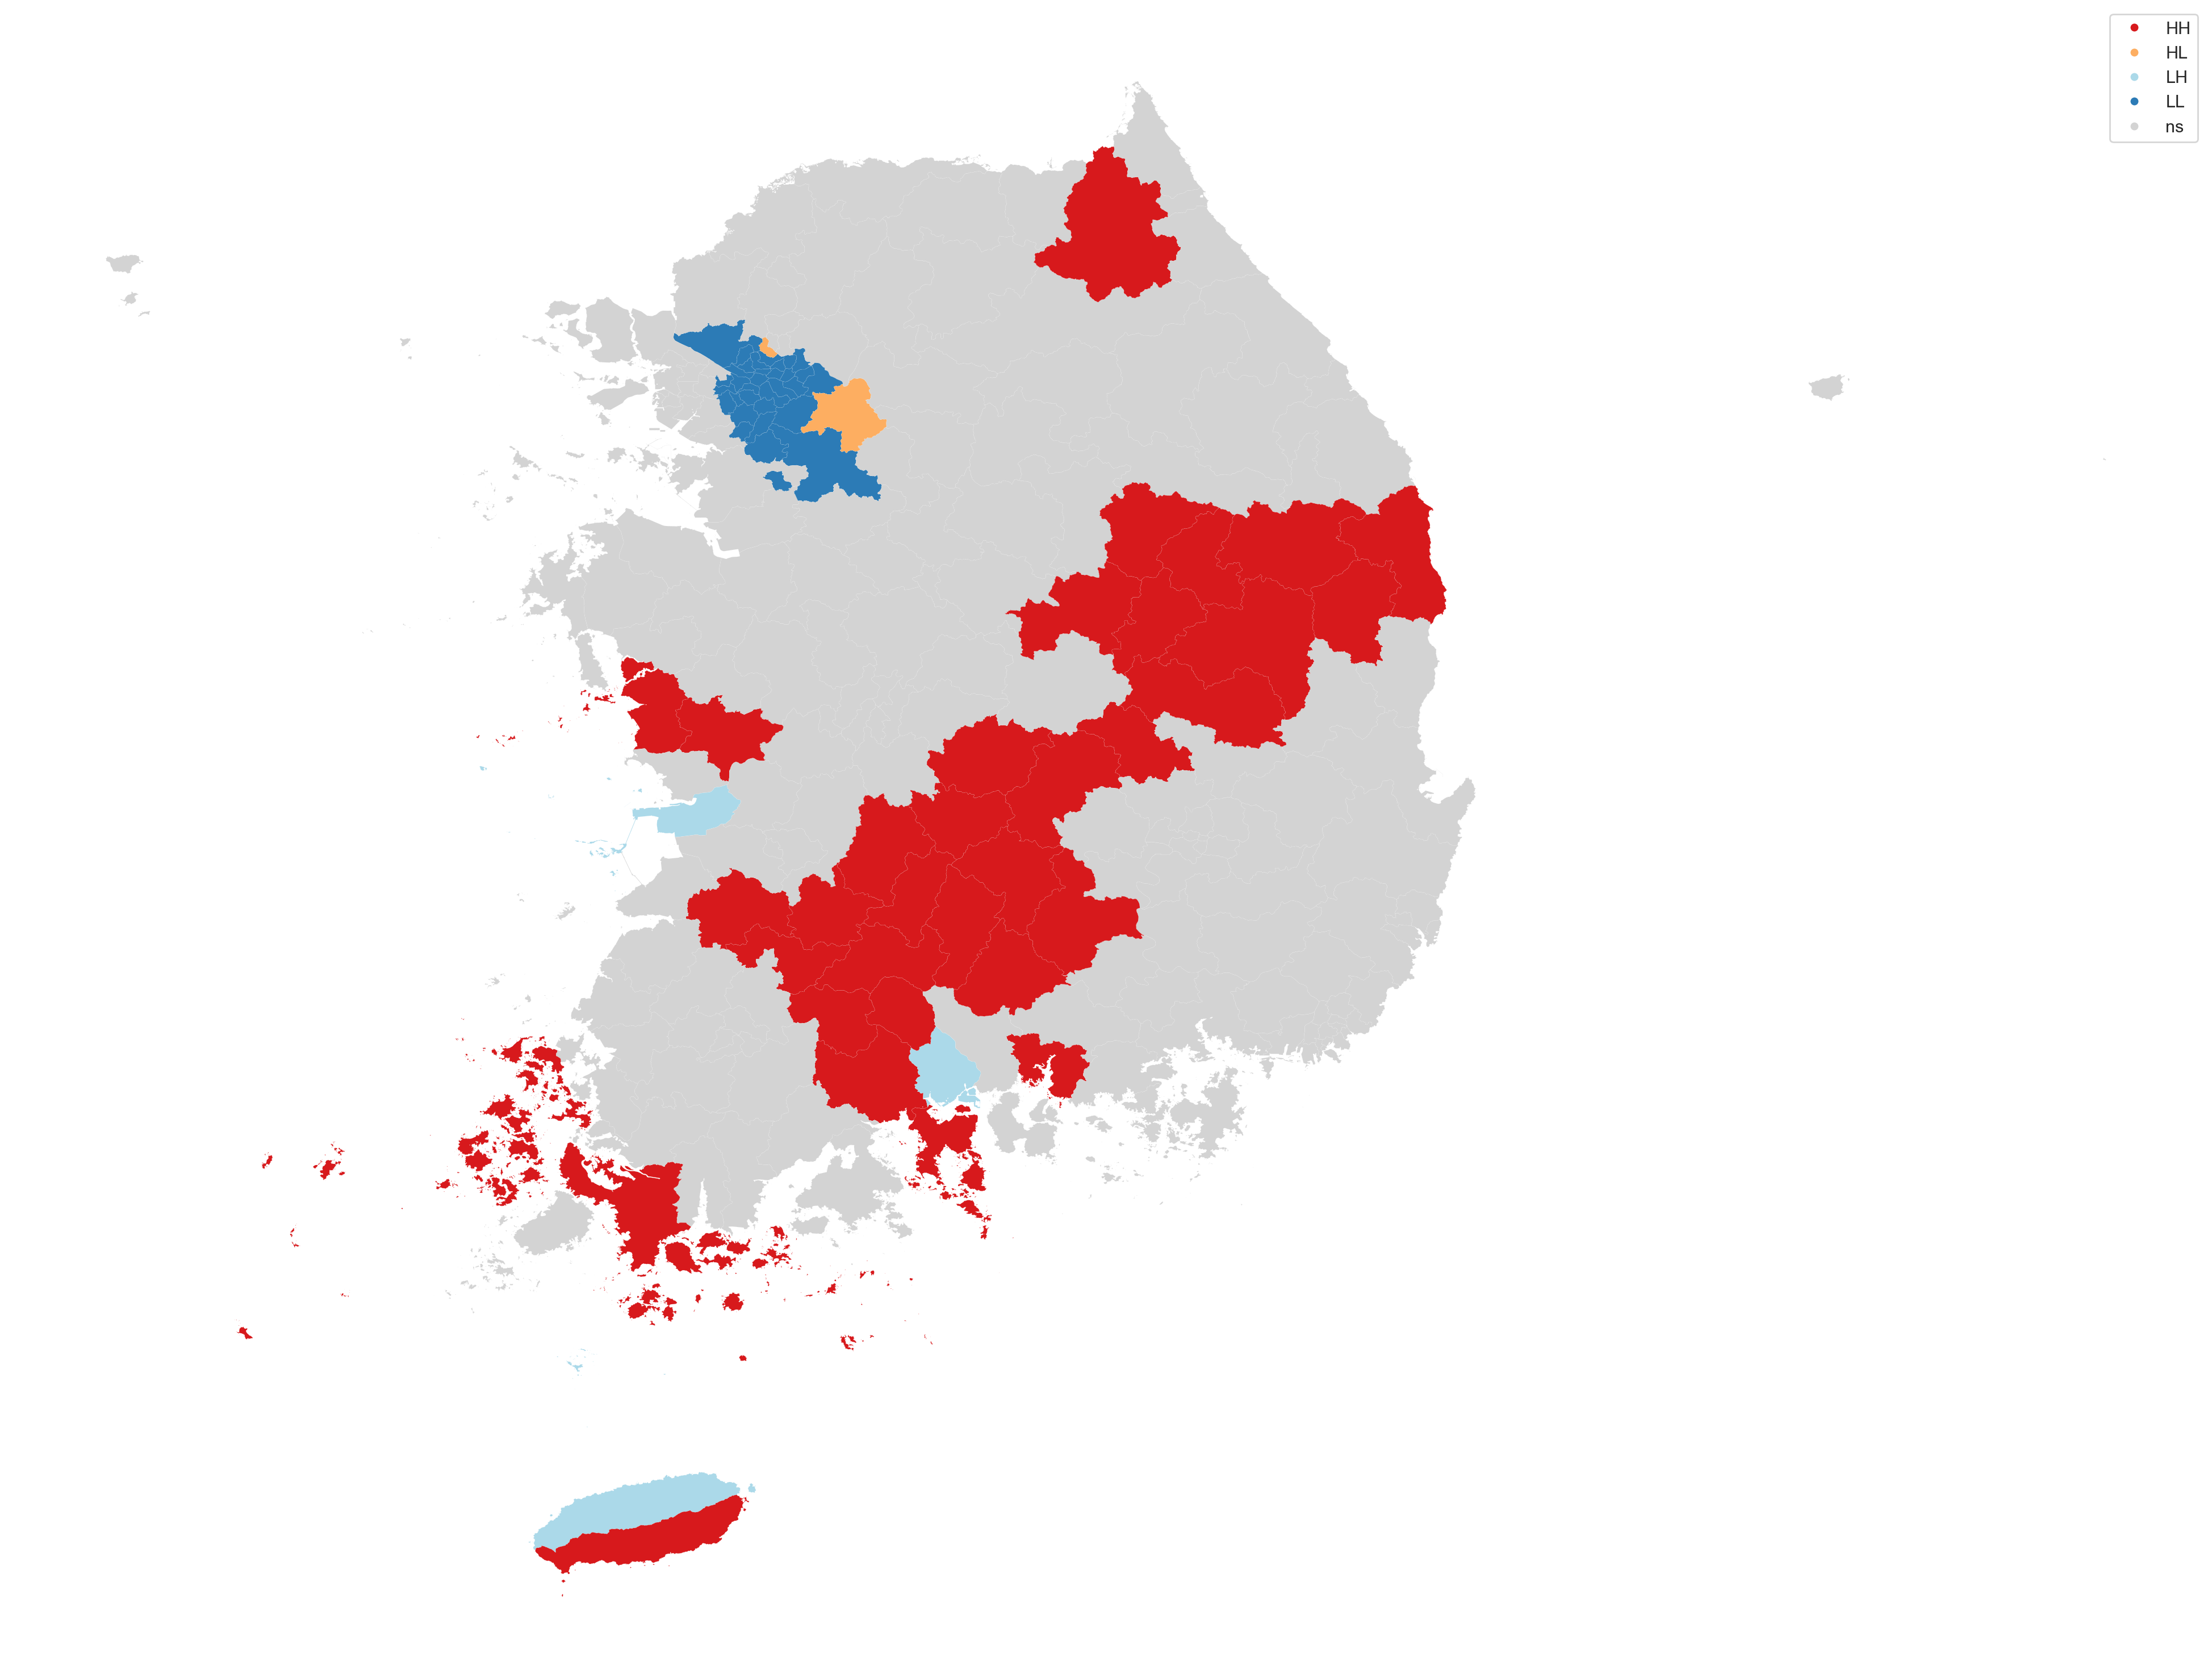

In [47]:
lisa_cluster(moran_loc, data_analysis_df, p=0.05, figsize = (50,50))
plt.show()